# Sampling example

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

In [2]:
# Plot function
def plot_decision_function(classifier, sample_weight, axis, title):
    # plot the decision function
    xx, yy = np.meshgrid(np.linspace(-4, 5, 500), np.linspace(-4, 5, 500))

    Z = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # plot the line, the points, and the nearest vectors to the plane
    axis.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.bone)
    axis.scatter(X[:, 0], X[:, 1], c=y, s=100 * sample_weight, alpha=0.9,
                 cmap=plt.cm.bone, edgecolors='black')

    axis.axis('off')
    axis.set_title(title)

Setup the points

In [8]:
# we create 20 points
np.random.seed(0)
X = np.r_[np.random.randn(10, 2) + [1, 1], np.random.randn(10, 2)]
y = [1] * 10 + [-1] * 10
sample_weight_last_ten = abs(np.random.randn(len(X)))
sample_weight_constant = np.ones(len(X))
# and bigger weights to some outliers
sample_weight_last_ten[15:] *= 5
sample_weight_last_ten[9] *= 15
print("X", X)
print("y", y)
print("sample_weight_constant", sample_weight_constant)
print("sample_weight_last_ten", sample_weight_last_ten)

X [[ 2.76405235  1.40015721]
 [ 1.97873798  3.2408932 ]
 [ 2.86755799  0.02272212]
 [ 1.95008842  0.84864279]
 [ 0.89678115  1.4105985 ]
 [ 1.14404357  2.45427351]
 [ 1.76103773  1.12167502]
 [ 1.44386323  1.33367433]
 [ 2.49407907  0.79484174]
 [ 1.3130677   0.14590426]
 [-2.55298982  0.6536186 ]
 [ 0.8644362  -0.74216502]
 [ 2.26975462 -1.45436567]
 [ 0.04575852 -0.18718385]
 [ 1.53277921  1.46935877]
 [ 0.15494743  0.37816252]
 [-0.88778575 -1.98079647]
 [-0.34791215  0.15634897]
 [ 1.23029068  1.20237985]
 [-0.38732682 -0.30230275]]
y [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
sample_weight_constant [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
sample_weight_last_ten [1.04855297 1.42001794 1.70627019 1.9507754  0.50965218 0.4380743
 1.25279536 0.77749036 1.61389785 3.1911042  0.89546656 0.3869025
 0.51080514 1.18063218 0.02818223 2.14165935 0.33258611 1.51235949
 3.17161047 1.81370583]


Fit the models

In [9]:
# fit the model
clf_weights = svm.SVC(gamma=1)
clf_weights.fit(X, y, sample_weight=sample_weight_last_ten)

clf_no_weights = svm.SVC(gamma=1)
clf_no_weights.fit(X, y)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Plot

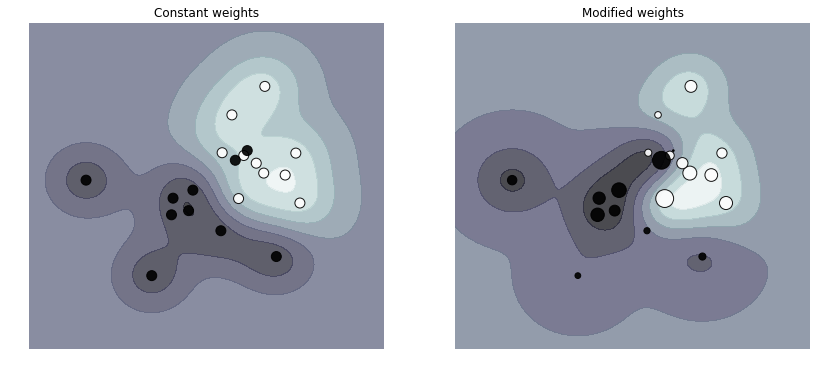

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
plot_decision_function(clf_no_weights, sample_weight_constant, axes[0],
                       "Constant weights")
plot_decision_function(clf_weights, sample_weight_last_ten, axes[1],
                       "Modified weights")

plt.show()